In [35]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
library(fgsea)
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [36]:
### set file directories
fdiry = file.path(FD_RES, "results", "comparison")
fname = "result.ranknorm.starrmpra.tsv"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath)

### assign and show
dat_peak_log2fc = dat
print(dim(dat))
head(dat)

Rows: 5166 Columns: 10
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): Chrom, Peak, TMPRA_Gene, TMPRA_Dataset, CRISPR_HCFF, Assay
dbl (4): Start, End, Log2FC, RankNorm_Total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 5166   10


Chrom,Start,End,Peak,TMPRA_Gene,TMPRA_Dataset,CRISPR_HCFF,Assay,Log2FC,RankNorm_Total
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chr11,4539569,4540043,chr11_4539569_4540043,HBE1,OL45,"HBE1,HBG1,HBG2,HBS1L,MYB",ASTARR,0.14501695,0.6550523
chr11,4551336,4552012,chr11_4551336_4552012,HBE1,OL45,NA,ASTARR,0.32125162,0.7560976
chr11,4553969,4555012,chr11_4553969_4555012,HBE1,OL45,NA,ASTARR,0.14529397,0.6556330
chr11,4569016,4569992,chr11_4569016_4569992,HBE1,OL45,NA,ASTARR,0.01136464,0.5673635
chr11,4577444,4578031,chr11_4577444_4578031,HBE1,OL45,NA,ASTARR,0.24524353,0.7154472
chr11,4601808,4602487,chr11_4601808_4602487,HBE1,OL45,NA,ASTARR,-0.57215284,0.1277584


In [37]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.ccre.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_peak_annot_ccre_v3 = dat %>% dplyr::filter(Annotation == "ccre_v3")
dat_peak_annot_ccre_v4 = dat %>% dplyr::filter(Annotation == "ccre_v4")
print(dim(dat))
head(dat)

Rows: 451244 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Peak, Category, Annotation
dbl (1): Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 451244      4


Peak,Category,Annotation,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,"DNase-H3K4me3,CTCF-bound",ccre_v3,2
chr10_100009096_100010466,Low-DNase,ccre_v3,1
chr10_100009096_100010466,"PLS,CTCF-bound",ccre_v3,1
chr10_100020710_100021134,Low-DNase,ccre_v3,2
chr10_100045961_100046653,"CTCF-only,CTCF-bound",ccre_v3,1
chr10_100065094_100065486,Low-DNase,ccre_v3,1


In [38]:
dat = dat_peak_annot_ccre_v4
lst = split(dat$Peak, dat$Category)

lst_annot = lst

print(length(lst))
print(names(lst))
cat("\n\n")

for (idx in names(lst_annot)){
    x = lst_annot[[idx]]
    cat(idx, length(x), "\n")
    print(head(x))
    cat("\n\n")
}

[1] 8
[1] "CA-CTCF"    "CA-H3K4me3" "CA-only"    "CA-TF"      "dELS"      
[6] "Low-DNase"  "pELS"       "PLS"       


CA-CTCF 23298 
[1] "chr10_100045961_100046653" "chr10_100240591_100241246"
[3] "chr10_100338359_100339077" "chr10_100342247_100342824"
[5] "chr10_100433434_100434444" "chr10_100481467_100483191"


CA-H3K4me3 3240 
[1] "chr10_100009096_100010466" "chr10_100454273_100455313"
[3] "chr10_100968842_100970495" "chr10_101049986_101050921"
[5] "chr10_101213416_101215567" "chr10_101291189_101292927"


CA-only 1546 
[1] "chr10_102619485_102621210" "chr10_102674009_102674869"
[3] "chr10_107055680_107057103" "chr10_110833464_110835250"
[5] "chr10_117424809_117425441" "chr10_119468542_119469551"


CA-TF 26756 
[1] "chr10_100129051_100131059" "chr10_100289686_100290090"
[3] "chr10_100325166_100325596" "chr10_100364513_100365906"
[5] "chr10_100433434_100434444" "chr10_100481467_100483191"


dELS 15782 
[1] "chr10_100358645_100359733" "chr10_100370571_100371646"
[3] "chr10_1008874_10

In [39]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::group_by(Peak) %>% 
    dplyr::summarise(
        RankNorm = mean(RankNorm_Total),
        .groups  = "drop") %>%
    dplyr::arrange(RankNorm)

head(dat)

Peak,RankNorm
<chr>,<dbl>
chrX_48996933_48997220,0.002129307
chr8_128298518_128298762,0.009291521
chr8_128242220_128242507,0.039876113
chr11_34024311_34024546,0.040456833
chr8_128189792_128190210,0.041231127
chr20_56703281_56703575,0.048199768


In [40]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::group_by(Peak) %>% 
    dplyr::summarise(
        RankNorm = mean(RankNorm_Total),
        .groups  = "drop") %>%
    dplyr::arrange(RankNorm)

vec = dat$RankNorm
names(vec) = dat$Peak

vec_peak = vec
print(length(vec))
print(head(vec))

[1] 1722
  chrX_48996933_48997220 chr8_128298518_128298762 chr8_128242220_128242507 
             0.002129307              0.009291521              0.039876113 
 chr11_34024311_34024546 chr8_128189792_128190210  chr20_56703281_56703575 
             0.040456833              0.041231127              0.048199768 


In [41]:
set.seed(42)
fgseaRes = fgsea(pathways  = lst_annot, 
                 stats     = vec_peak,
                 eps       = 0.0,
                 #minSize   = 15,
                 #maxSize   = 500,
                 scoreType = "pos"
                )

print(class(fgseaRes))

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (13.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


[1] "data.table" "data.frame"


In [42]:
dat = fgseaRes
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nLogP = -log10(padj))
head(dat)

pathway,pval,padj,log2err,ES,NES,size,nLogP
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
CA-CTCF,1.198801e-01,1.598402e-01,0.12384217,0.2492458,1.2052135,148,0.79631409
CA-H3K4me3,1.053681e-02,1.685889e-02,0.38073040,0.4601004,1.6949645,20,1.77317101
CA-TF,9.042251e-03,1.685889e-02,0.38073040,0.2803611,1.3874258,200,1.77317101
CA-only,4.815185e-01,5.503068e-01,0.04735342,0.3570007,1.0144088,6,0.25939509
Low-DNase,8.901099e-01,8.901099e-01,0.01603044,0.1626470,0.8421447,1245,0.05055637
PLS,6.877440e-27,2.750976e-26,1.34223377,0.6179431,2.9459986,125,25.56051319


In [43]:
theme_color = scale_colour_gradient(low = "#fcbba1", high = "#cb181d")

theme_text = theme(
        axis.text.x = element_text(size=15),
        axis.text.y = element_text(size=15)
)

theme_grid = theme(
    panel.grid.major.x = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.major.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.minor.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1)
)

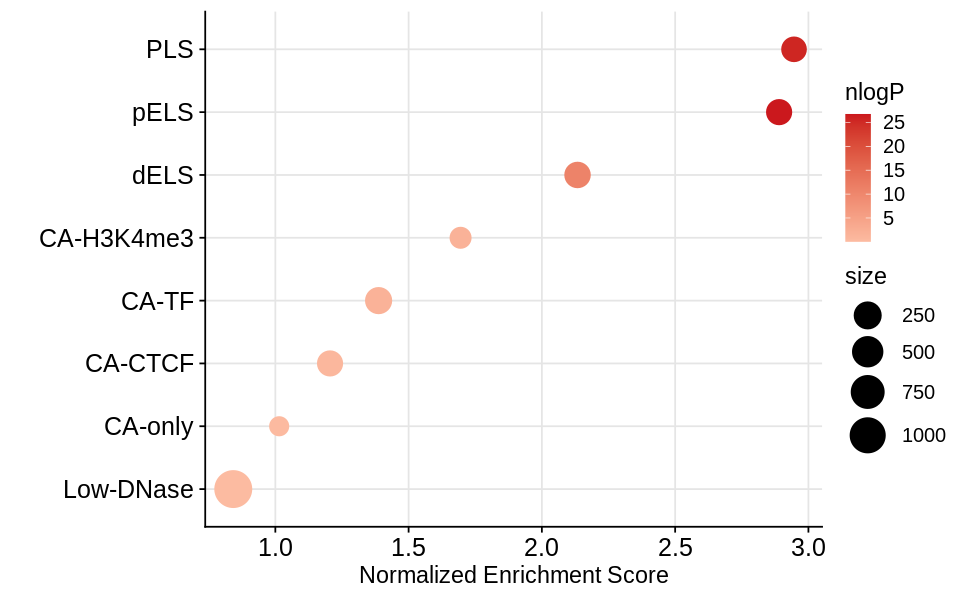

In [45]:
dat = fgseaRes
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nlogP = -log10(padj)) %>%
    dplyr::arrange(NES) %>%
    dplyr::mutate(pathway = factor(pathway, levels=pathway))

gpt = ggplot(dat, aes(x = NES, y=pathway, size=size, color=nlogP)) + 
    geom_point() + 
    scale_size(range = c(5, 10)) +
    labs(x = "Normalized Enrichment Score", y = "") +
    theme_cowplot() +
    theme_grid +
    theme_text +
    theme_color

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [46]:
dat = fgseaRes
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nlogP = -log10(padj)) %>%
    dplyr::mutate(pathway = factor(pathway, levels=pathway))
dat

pathway,pval,padj,log2err,ES,NES,size,nlogP
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
CA-CTCF,1.198801e-01,1.598402e-01,0.12384217,0.2492458,1.2052135,148,0.79631409
CA-H3K4me3,1.053681e-02,1.685889e-02,0.38073040,0.4601004,1.6949645,20,1.77317101
CA-TF,9.042251e-03,1.685889e-02,0.38073040,0.2803611,1.3874258,200,1.77317101
CA-only,4.815185e-01,5.503068e-01,0.04735342,0.3570007,1.0144088,6,0.25939509
Low-DNase,8.901099e-01,8.901099e-01,0.01603044,0.1626470,0.8421447,1245,0.05055637
PLS,6.877440e-27,2.750976e-26,1.34223377,0.6179431,2.9459986,125,25.56051319
dELS,6.784074e-12,1.809087e-11,0.88707499,0.4378838,2.1337759,164,10.74254067
pELS,2.325663e-28,1.860531e-27,1.38026492,0.5971901,2.8900867,149,26.73036317


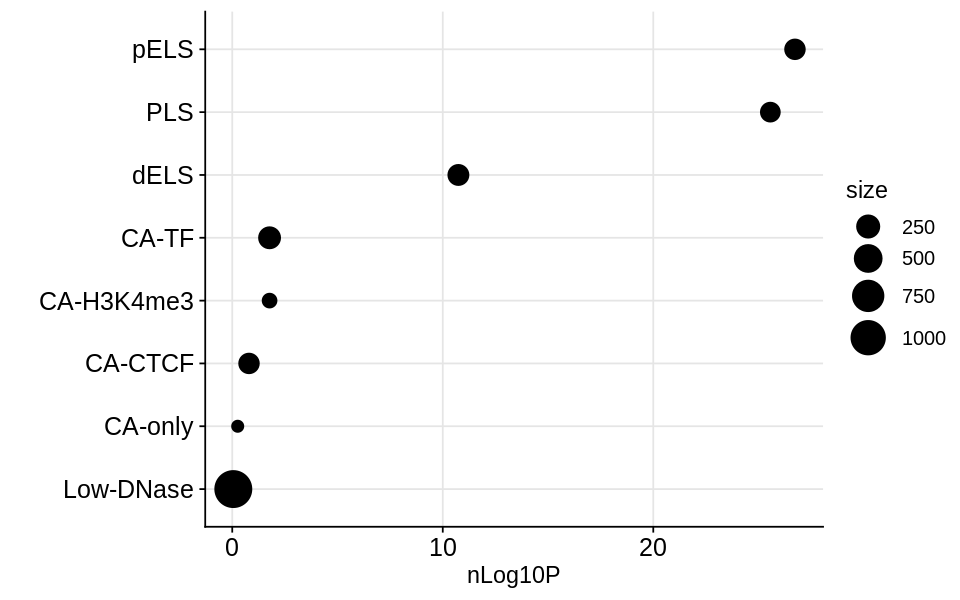

In [47]:
dat = fgseaRes
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nlogP = -log10(padj)) %>%
    dplyr::arrange(nlogP) %>%
    dplyr::mutate(pathway = factor(pathway, levels=pathway))
    
gpt = ggplot(dat, aes(x = nlogP, y=pathway, size=size)) + 
    geom_point() + 
    scale_size(range = c(3, 10)) +
    labs(x = "nLog10P", y = "") +
    theme_cowplot() +
    theme_grid +
    theme_text

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [48]:
dat$pathway

[1] Low-DNase  CA-only    CA-CTCF    CA-H3K4me3 CA-TF      dELS       PLS       
[8] pELS      
Levels: Low-DNase CA-only CA-CTCF CA-H3K4me3 CA-TF dELS PLS pELS

In [32]:
length(dat$pathway)

[1] 11

In [33]:
'DNase-H3K4me3', 'CTCF-only,CTCF-bound', 'Low-DNase', 'DNase-H3K4me3,CTCF-bound', 'DNase-only', 'dELS,CTCF-bound', 'pELS,CTCF-bound', 'PLS,CTCF-bound', 'dELS', 'PLS', 'pELS'

ERROR: Error in parse(text = x, srcfile = src): <text>:1:16: unexpected ','
1: 'DNase-H3K4me3',
                   ^
